# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Objective : Membuat model machine learning untuk membuat prediksi biaya asuransi seseorang yang datanya diambil dari [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance) sesuai dari instruksi [Milestone 2](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-m2-andik-alfauzi)

# **2 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

# Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# persiapan Data Loading dan set kaggle
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle
!cp /content/drive/MyDrive/Haktiv8/kaggle.json ~/.kaggle

# Cek kaggle berhasil berhasil dijalankan
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
kaggle.json


In [4]:
# Get dataset from kaggle
!kaggle datasets download -d mirichoi0218/insurance

# Extract dataset kaggle
!unzip -q /content/insurance.zip

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 3.68MB/s]


In [5]:
# Read the dataset
data = pd.read_csv('/content/insurance.csv')

# Copy data to make sure the original is untouchable
copyData = data.copy()

# Display
copyData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data ada sebanyak **1.338** baris dan **7** kolom

Berikut adalah penjelasan data di masing-masing berdasarkan sumber:

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

# **4 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [6]:
# Check information of data
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


5 data bertipe numeric dan 3 data categorical

In [7]:
# Check data describe
copyData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Hampir keseluruhan data berdistribusi normal, dan ada beberapa data yang cenderung skewness

In [8]:
# Check data duplicated
print('Data Duplikat ada : ', copyData.duplicated().sum())
print('')
# Find duplicate in dataframe
copyData[copyData.duplicated()]

Data Duplikat ada :  1



,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Ada sebanyak 1 data duplikat yang akan dihapus dari dataset.

In [9]:
# Droping duplicated
copyData = copyData.drop_duplicates()

# Check data duplicated
print('Data Duplikat ada : ', copyData.duplicated().sum())

Data Duplikat ada :  0


1 Data duplikat berhasil dihapus

In [10]:
# Check Missing value
copyData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak ada missing value dalam data

In [11]:
# Function Visualization
def diagnosticPlots(df, variable):
  plt.figure(figsize=(18, 25))

  # Histogram
  plt.subplot(5, 1, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram '+variable)

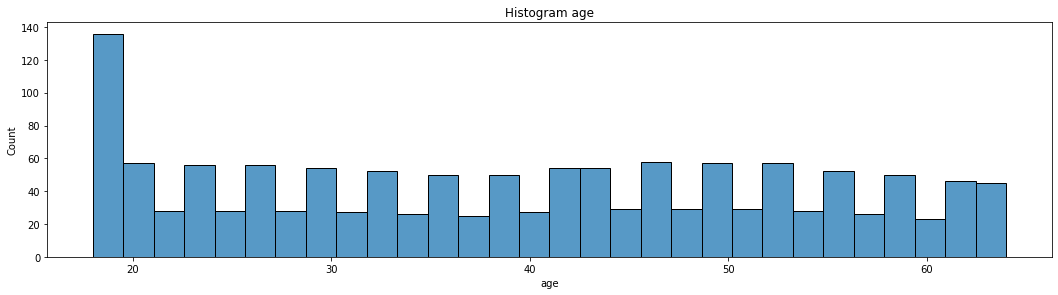

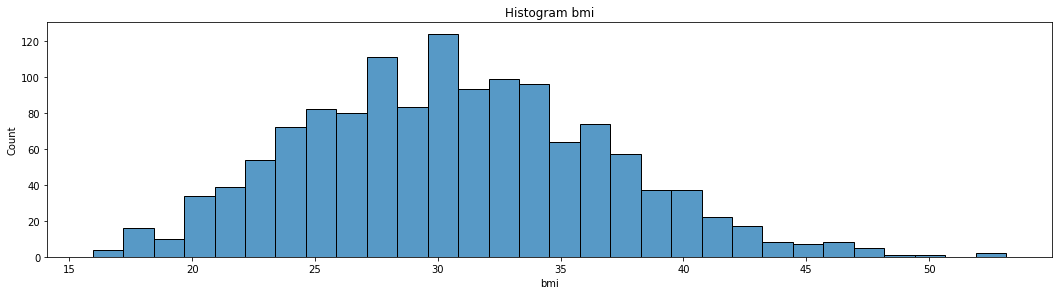

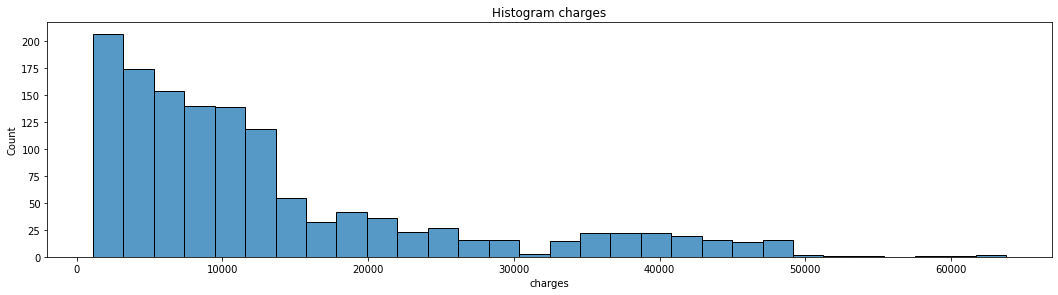

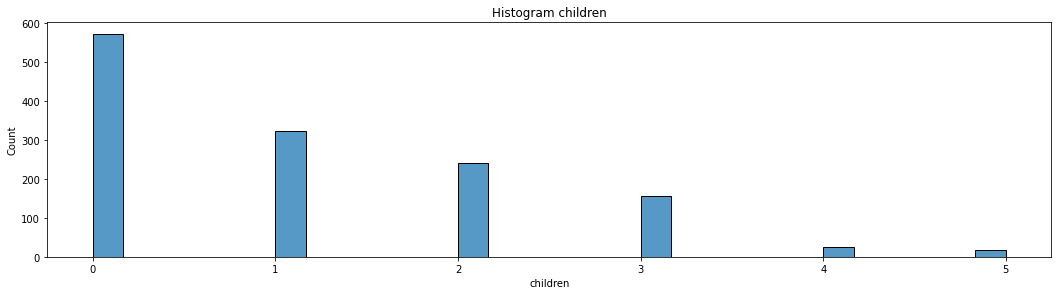

In [12]:
# Visualization
diagnosticPlots(copyData, 'age')
diagnosticPlots(copyData, 'bmi')
diagnosticPlots(copyData, 'charges')
diagnosticPlots(copyData, 'children')

Visualisasi diatas dapat disimpulkan bahwa untuk data `bmi` cenderung normal distribusi. Banyak dari data diatas yang menyatakan bahwa mereka blm mempunyai anak.

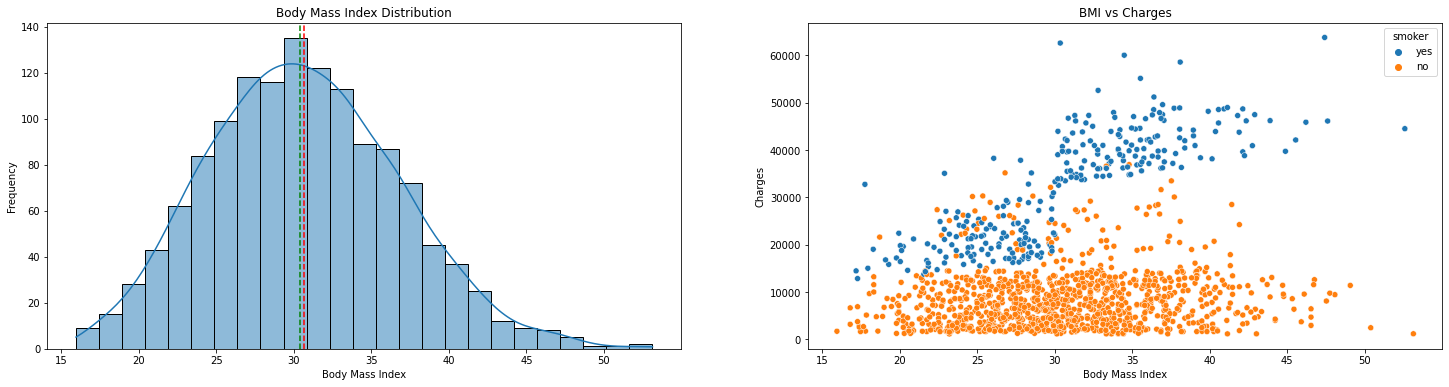

In [13]:
# Visualization of bmi
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=copyData, kde=True)
plt.axvline(copyData.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(copyData.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=copyData, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()
print('')
print(f'Skewness: {copyData["bmi"].skew()}')
print(f'Mean: {(copyData["bmi"].mean())}')
print(f'Median: {copyData["bmi"].median()}')

Body Mass Index (bmi) bagi yang perokok berbanding lurus dengan biaya yang harus dibayarkan, yang artinya jika bmi nya semakin tinggi maka semakin banyak pula biaya yang harus dibayarkan. Sementara bagi mereka yang tidak merokok maka biaya asuransinya akan lebih rendah.

In [14]:
# Find BMI < 18.5
bmiUnder = copyData.loc[(copyData['bmi'] < 18.5 )]
bmiUnder


Skewness: 0.28391419385321137
Mean: 30.66345175766642
Median: 30.4


,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
128,32,female,17.765,2,yes,northwest,32734.18630
172,18,male,15.960,0,no,northeast,1694.79640
198,51,female,18.050,0,no,northwest,9644.25250
232,19,female,17.800,0,no,southwest,1727.78500
250,18,male,17.290,2,yes,northeast,12829.45510
380,27,female,17.955,2,yes,northeast,15006.57945
410,19,male,17.480,0,no,northwest,1621.34020
412,26,female,17.195,2,yes,northeast,14455.64405
428,21,female,16.815,1,no,northeast,3167.45585


In [15]:
# Find BMI >  24.9
bmiUpper = copyData.loc[(copyData['bmi'] > 24.9 )]
bmiUpper

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


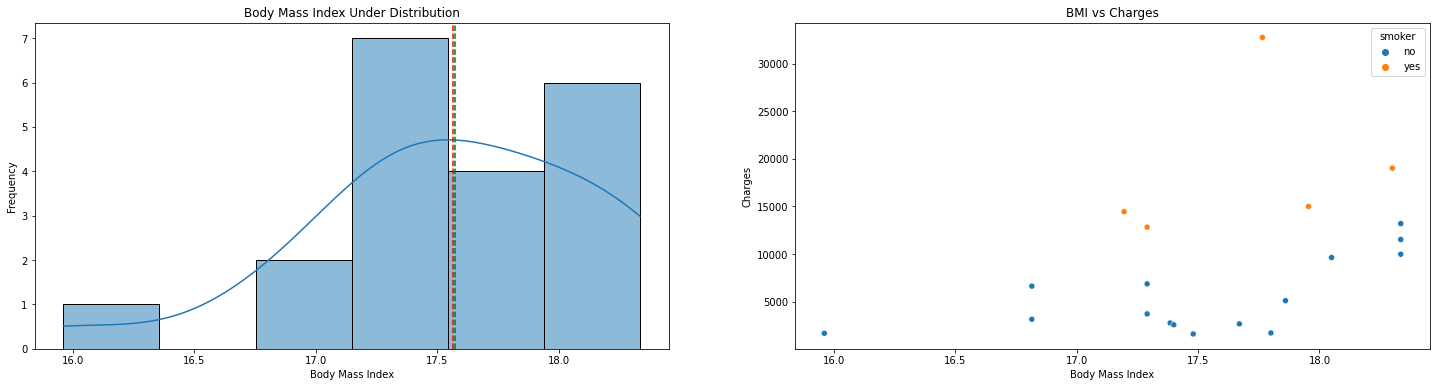

In [16]:
# Visualization of bmi under
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=bmiUnder, kde=True)
plt.axvline(bmiUnder.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(bmiUnder.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Under Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=bmiUnder, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()

Walaupun banyak dari mereka yang tidak merokok, tapi kebanyakan nilai `bmi` mereka dibawah normal. Mungkin ini dikarenakan faktor turunan atau ada masalah metabolisme masing-masing individu

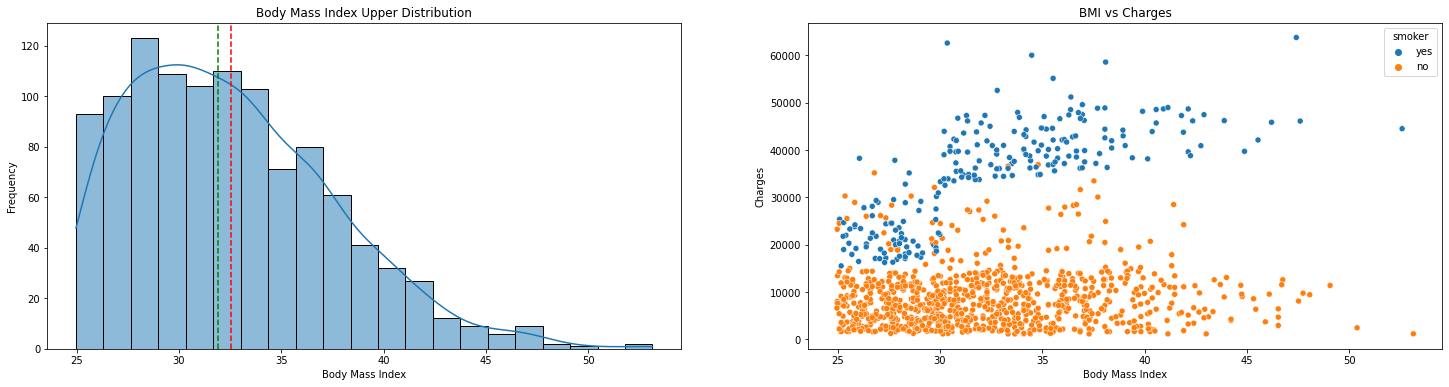

In [17]:
# Visualization of bmi upper
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=bmiUpper, kde=True)
plt.axvline(bmiUpper.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(bmiUpper.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Upper Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=bmiUpper, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()

Walaupun yang tidak merokok ada sebanyak 800an orang tetapi tingkat `bmi` diatas batas normal, ini menandakan banyak dari mereka yang memiliki pola hidup tidak sehat, semisal jarang berolahraga ataupun tidak memperhatikan makanan dan pola tidur yang tidak teratur.

In [18]:
# Find smoker
smokeDF = copyData.loc[(copyData['smoker'] == 'yes')]
smokeDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


Ada 274 orang perokok

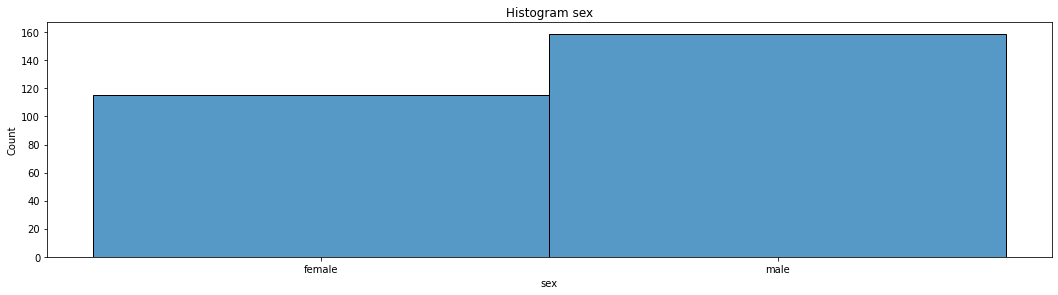

In [19]:
# Visualization
diagnosticPlots(smokeDF, 'sex')

Banyak dari perokok adalah kalangan perempuan dengan total 150an orang

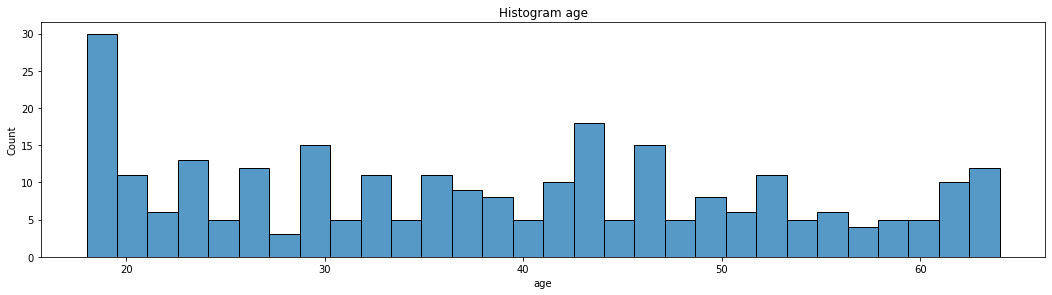

In [20]:
# Visualization
diagnosticPlots(smokeDF, 'age')

Umur 18-20 tahun menjadi yang terbanyak dalam kalangan perokok, yaitu sekitar 30 orang

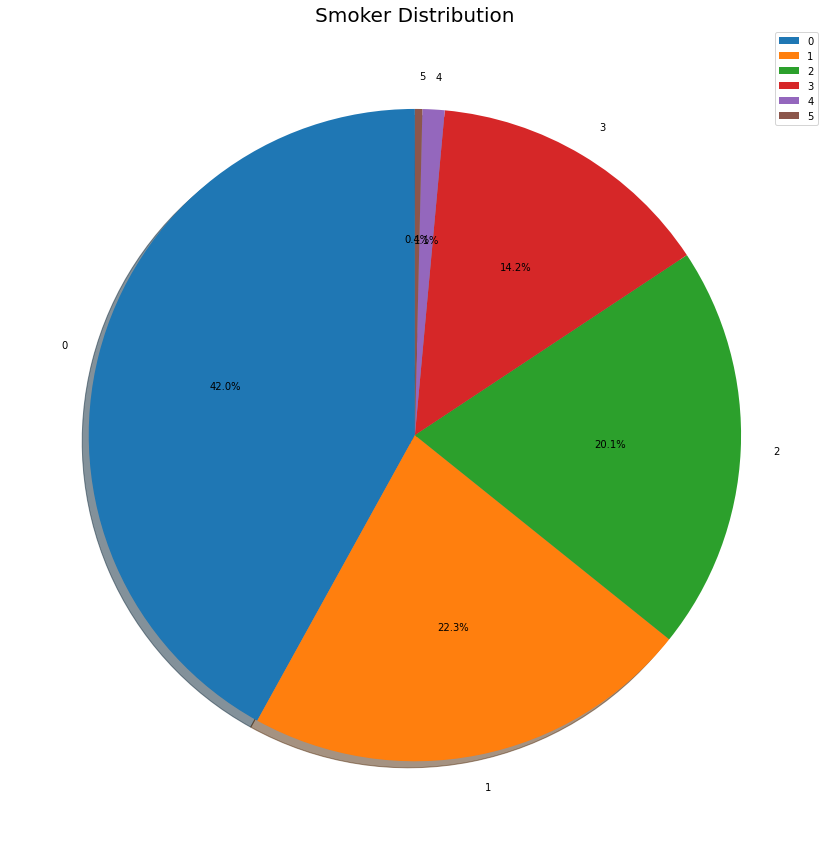

In [21]:
# Smoker have a children Percentage
sdf = smokeDF.groupby('children').size()
plt.figure(figsize = (30, 15))
plt.pie(sdf, labels = sdf.index, shadow = True, startangle = 90, autopct='%1.1f%%')
plt.title('Smoker Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Banyak dari kalangan perokok adalah mereka yang belum mempunyai anak, mungkin ini berkaitan dengan financial jika mereka menggunakan uangnya untuk membeli rokok maka dikhawatirkan tidak dapat memenuhi kebutuhan anaknya.

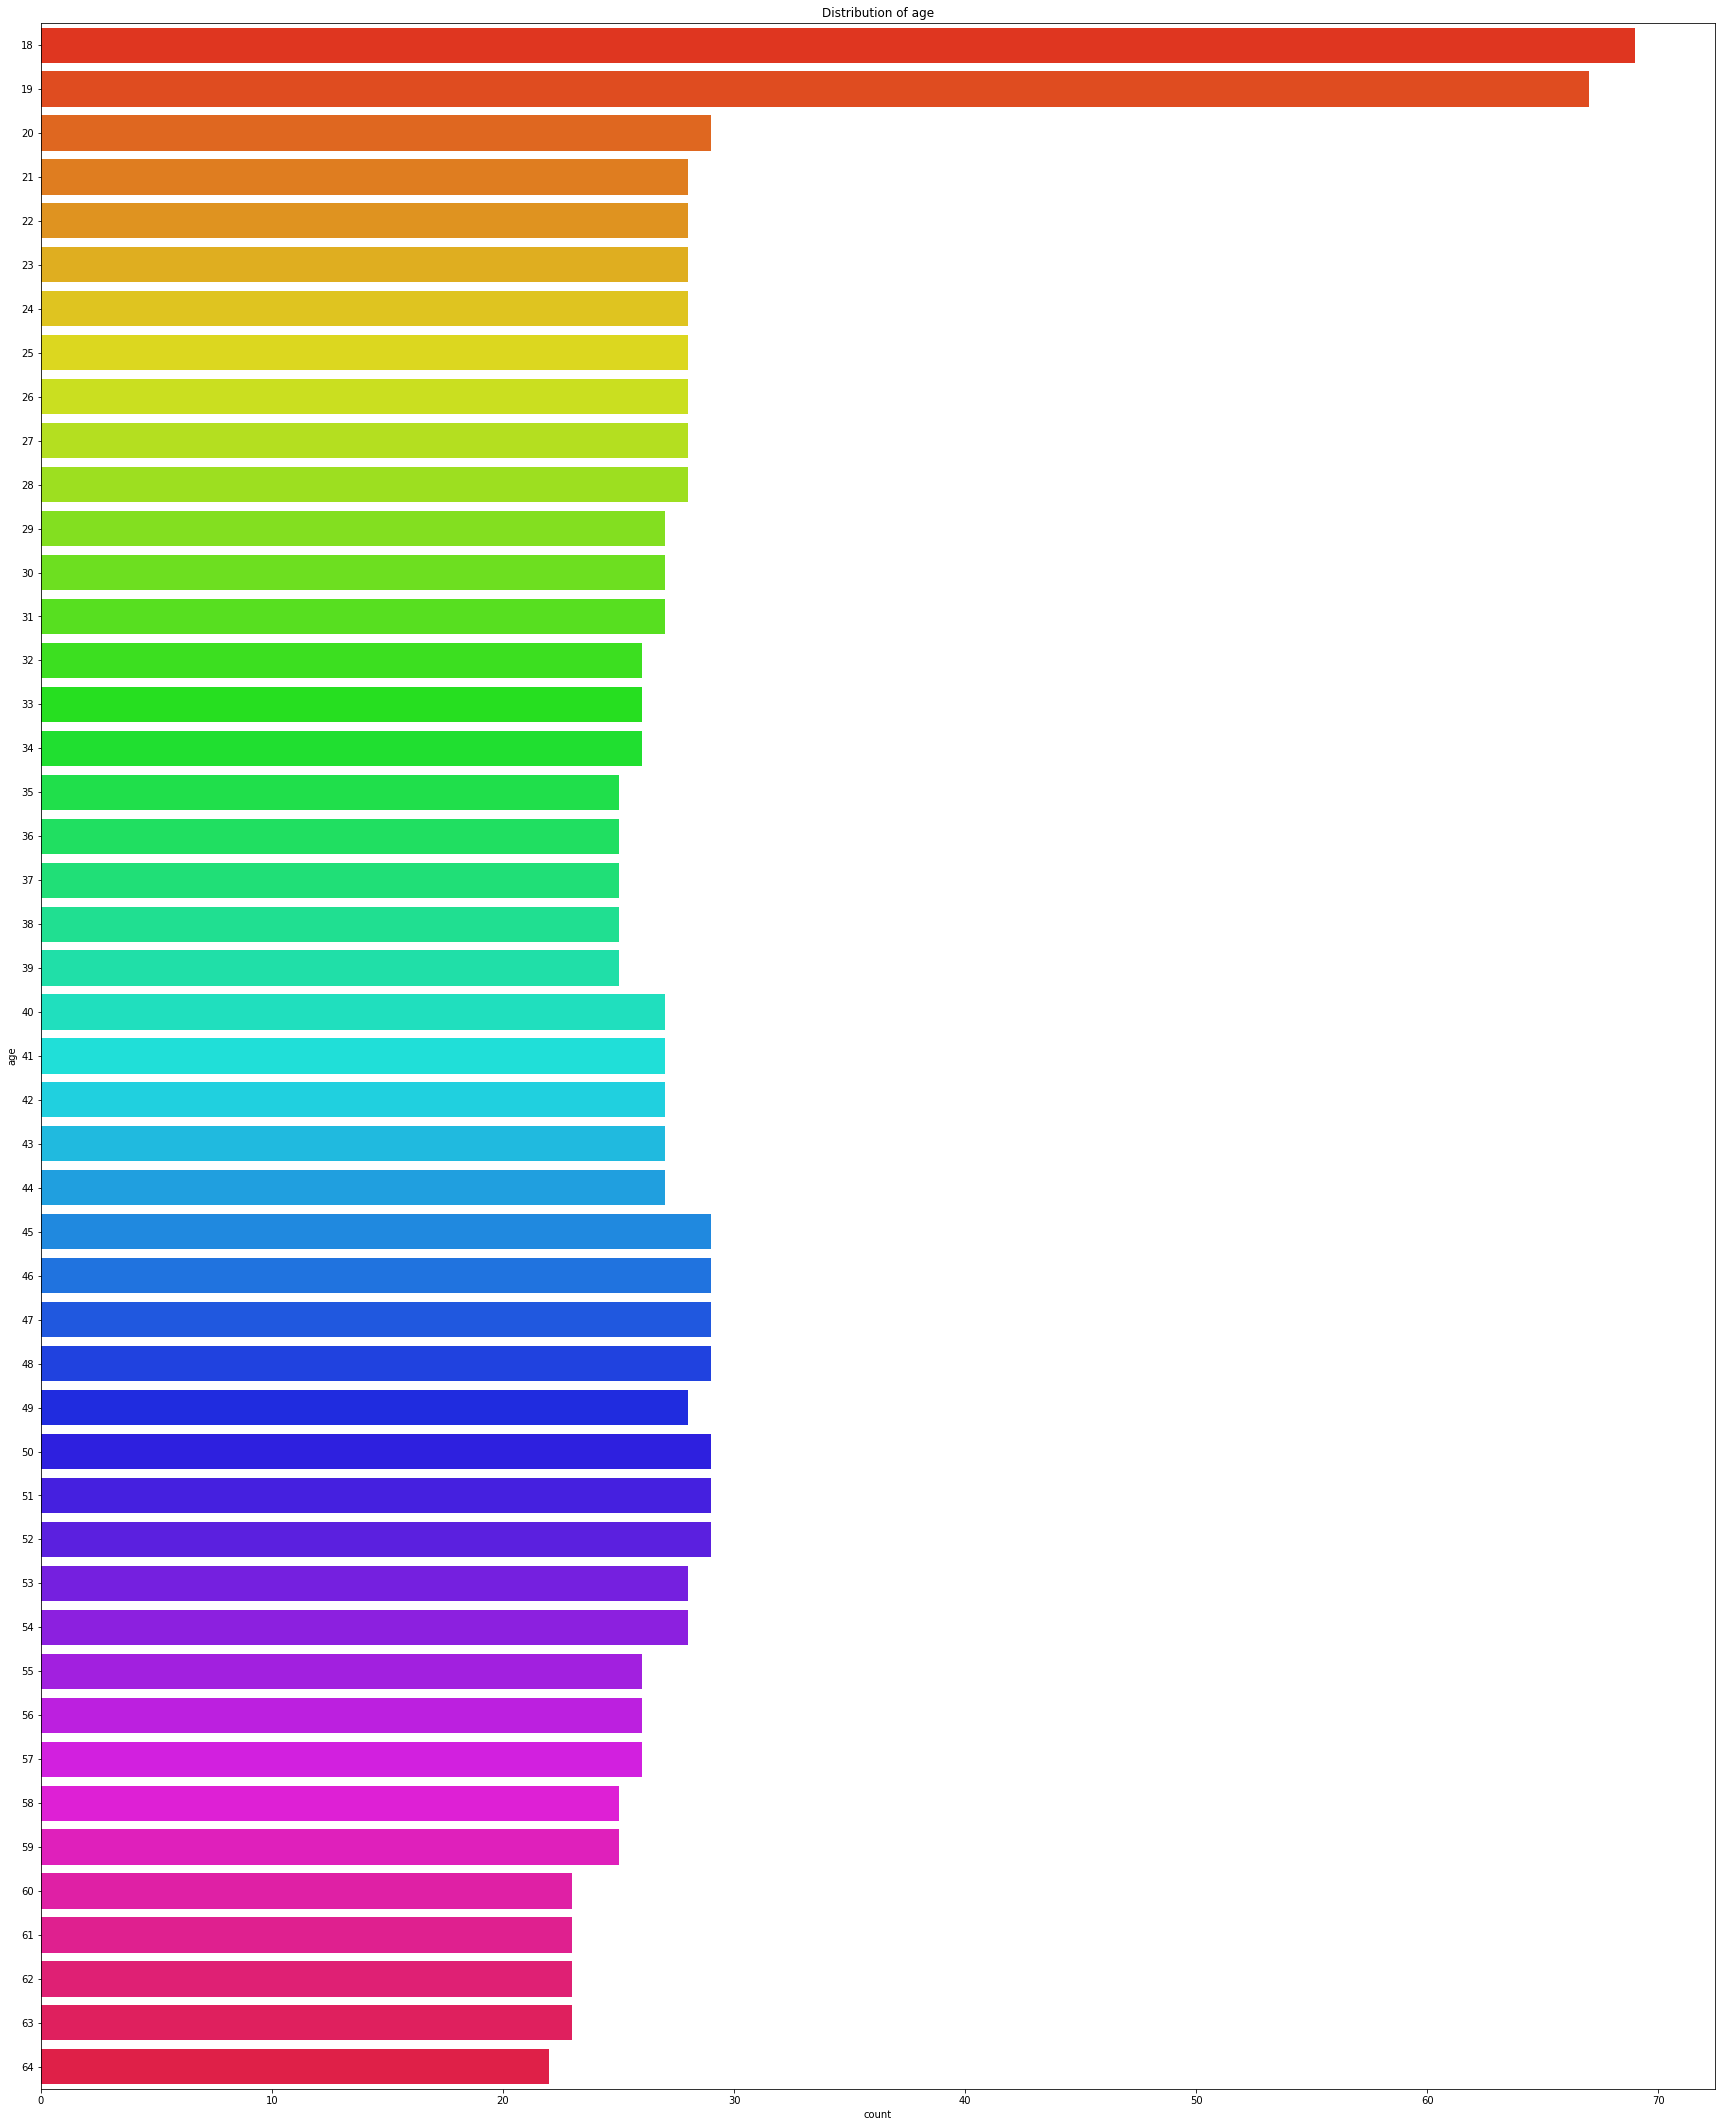

In [22]:
# Data Age visualization
plt.rcParams['figure.figsize'] = (30, 38)
sns.countplot(y = copyData['age'], palette = 'hsv')
sns
plt.title('Distribution of age')
plt.show()

Data dengan umur dibawah 20 tahun adalah yang paling banyak dengan total sekitar 135 orang

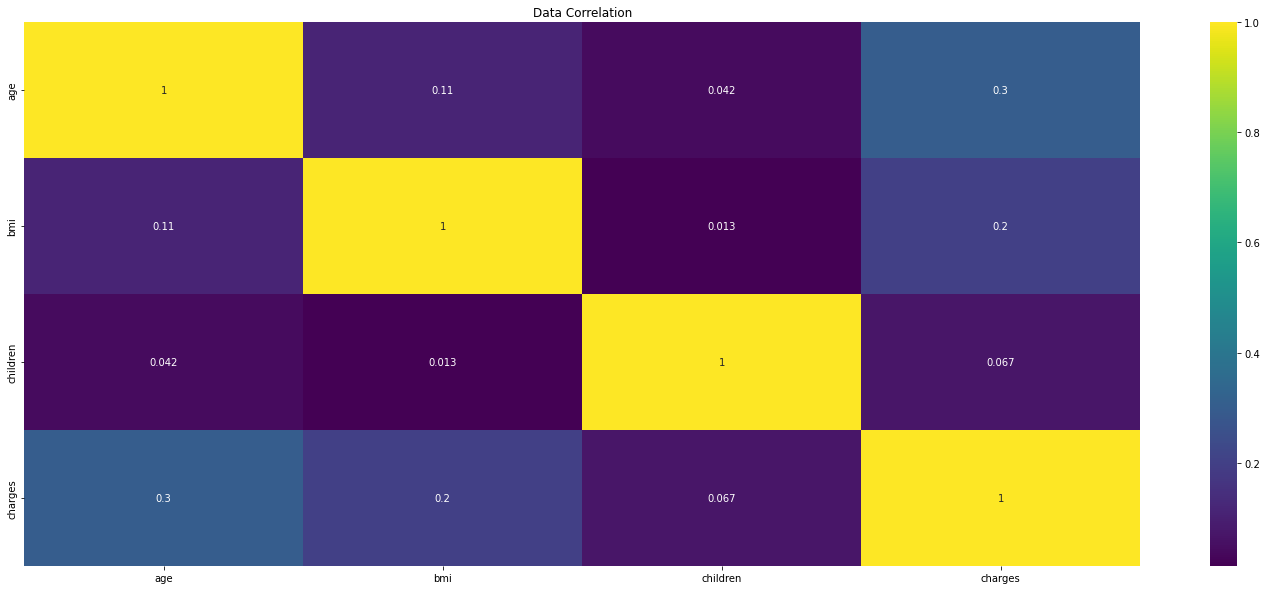

In [23]:
# Check korelasi
plt.figure(figsize=(25, 10))
sns.heatmap(copyData.corr(), annot=True, cmap='viridis')
plt.title('Data Correlation')
plt.show()

Bagi mereka yang memiliki umur semakin tinggi, kemungkinan ada dikenakan charges yang tinggi pula. ini ditandai dengan nilai korelasiya sebesar 30%

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 Data Binning

In [24]:
# Binning data age
criteria = [
    (copyData['age'] > 15) & (copyData['age'] < 25),
    (copyData['age'] >= 25) & (copyData['age'] < 55),
    (copyData['age'] >= 55)
]
ageLabel = ['teen', 'adult', 'old']
copyData['age_bin'] = pd.cut(copyData['age'], bins = ['15', '25', '55', float('inf')], labels=ageLabel)

copyData.age_bin.unique()

['teen', 'adult', 'old']
Categories (3, object): ['teen' < 'adult' < 'old']

## 6.2 Split between Feature and Target

In [25]:
# Split between feature and target
X = copyData.drop(['charges'], axis=1)
y = copyData['charges']

# Display
X.head()

,age,sex,bmi,children,smoker,region,age_bin
0,19,female,27.900,0,yes,southwest,teen
1,18,male,33.770,1,no,southeast,teen
2,28,male,33.000,3,no,southeast,adult
3,33,male,22.705,0,no,northwest,adult
4,32,male,28.880,0,no,northwest,adult


## 6.3 Split between Train and Test

In [26]:
# Split to train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

# Cek shape data
print('Shape of X_train : ', X_train.shape)
print('Shape of X_train : ', X_test.shape)

Shape of X_train :  (1069, 7)
Shape of X_train :  (268, 7)


Data untuk Train sebesar 80% berjumlah **1.069** data dan untuk test sejumlah **268** data

## 6.4 Missing Value

In [27]:
# Check missing value
print('Missing value di X_train : ')
print(X_train.isnull().sum())
print('')
print('Missing value di X_test  : ')
print(X_test.isnull().sum())
print('')
print('Missing value di y_train : ')
print(y_train.isnull().sum())
print('')
print('Missing value di y_test  : ')
print(y_test.isnull().sum())

Missing value di X_train : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
age_bin     0
dtype: int64

Missing value di X_test  : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
age_bin     0
dtype: int64

Missing value di y_train : 
0

Missing value di y_test  : 
0


Tidak ada missing value dalam data

## 6.5 Outlier Handling

Pada bagan ini, saya akan menghandle outlier jika :
1. Data outlier < 5%  akan didrop
2. Data outlier > 5% -  <= 30% akan dihandle
3. Data ouliier > 30% akan dibiarkan

In [28]:
# Outlier function recognition
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [29]:
# Find Outlier
cols = ['age', 'bmi']
outlier_percentage = pd.DataFrame(columns = ['Column', 'Outlier Percentage'])
for i in range(len(cols)):
      outlier_percentage.loc[i] = [cols[i], round(upper_lower(X_train, cols[i]).shape[0] / X_train.shape[0] * 100, 2)]

outlier_percentage

,Column,Outlier Percentage
0,age,100.00
1,bmi,99.25


Sesuai statement diatas maka outlier akan saya biarkan, atau ini memang adalah outlier normal

## 6.6 Feature Selection

In [30]:
# Feature selection
X_train.drop(columns=['age', 'region'], axis=1, inplace=True)
X_test.drop(columns=['age', 'region'], axis=1, inplace=True)

# Display
X_train

,sex,bmi,children,smoker,age_bin
1020,male,37.000,0,no,adult
1040,female,28.025,0,yes,adult
1321,male,26.695,0,yes,old
897,male,25.555,1,no,teen
1063,male,28.595,3,no,adult
...,...,...,...,...,...
308,male,34.865,0,no,old
1044,male,35.245,1,no,adult
937,female,24.225,5,no,adult
758,male,37.430,3,no,adult


Saya menghapus data di kolom age karena sudah memiliki criteria age di kolom `age_bin`, untuk kolom `region` saya berasumsi tidak ada kaitannya dengan penentuan `charges` yang akan dibuat model prediksinya.

## 6.7 Split between Numerical and Categorical

In [31]:
# Split data numeric and categorical
numCol = X_train.select_dtypes(include = np.number).columns.tolist()
catCol = X_train.select_dtypes(include = ['object', 'category']).columns.tolist()

# Display
print('Numerical Data   : ', numCol)
print('Categorical Data : ', catCol)

groupFeatures = numCol + catCol

# Apply to data
X_train = X_train[groupFeatures]
X_test = X_test[groupFeatures]

Numerical Data   :  ['bmi', 'children']
Categorical Data :  ['sex', 'smoker', 'age_bin']


Data sudah dibagi sesuai dengan numeric dan categorical

## 6.8 Pipeline

In [32]:
# Create a pipeline
pipeBase = ColumnTransformer([
    ('OE', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), catCol),
    ('MinMaxScaler', MinMaxScaler(), numCol)
])

Deklarasi pipeline

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In this case, I'll try to make these alghoritm :
1. Linear Regression
2. Linear Regression with Polynomial Features
3. Random Forest Regressor
4. Support Vector Regression
5. Decission Tree Regressor

I'll compare it and choose the best one in the future

## 7.1 Linear Regression Model

In [33]:
# Define model linear 
%%time
linRegBase = LinearRegression(n_jobs=-1)

# Liner Regression Pipeline
pipeLinReg = Pipeline([
    ('preprocessing', pipeBase),
    ('linReg', linRegBase)
])

# Parameter for Linear Regression
linRegParam = {
    'linReg__fit_intercept' : ['True', 'False']
}

CPU times: user 37 µs, sys: 9 µs, total: 46 µs
Wall time: 50.1 µs


## 7.2 Linear Regression with polynomial

In [34]:
# Define polynomial
%%time
polyLinRegPipe = Pipeline([('preprocessing', pipeBase),
                         ('poly', PolynomialFeatures()),
                         ('model', LinearRegression())])

# Parameter for polynomial
polyParam = {'poly__degree': [2, 3, 4]}

CPU times: user 34 µs, sys: 0 ns, total: 34 µs
Wall time: 39.1 µs


## 7.3 Random Forest Regressor

In [35]:
# Define Random Forest
%%time
randForBase = RandomForestRegressor(random_state = 19, n_jobs=-1)

# Random forest pipeline
pipeRandFor = Pipeline([
    ('preprocessing', pipeBase),
    ('randFor', randForBase)
])

# Parameter for random forest
randFormParam = {
    'randFor__criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'randFor__max_features' : ['auto', 'sqrt', 'log2'],
    'randFor__warm_start' : [True, False]
}

CPU times: user 103 µs, sys: 23 µs, total: 126 µs
Wall time: 132 µs


## 7.4 Support Vector Machine - Regression

In [36]:
# Define SVM Regression 
%%time
svrBase = SVR(degree = 3, cache_size = 200, gamma='scale')

# SVR pipeline
pipeSVR = Pipeline([
    ('preprocessing', pipeBase),
    ('svr', svrBase)
])

# Parameter for SVR
svrParam = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree': [2, 3, 4, 5],
    'svr__C': [0.1, 0.5, 1.0]
}

CPU times: user 98 µs, sys: 0 ns, total: 98 µs
Wall time: 680 µs


## 7.5 Decission Tree Regressor

In [37]:
# Define Decission Tree
%%time
decTreeBase = DecisionTreeRegressor(random_state = 19)

# Decision Tree pipeline
pipeDecTree = Pipeline([
    ('preprocessing', pipeBase),
    ('decTree', decTreeBase)
])

# Parameter for decission tree
decTreeParam = {
    'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'dtr__spliter': ['best', 'random'],
    'dtr__max_features': ['auto', 'sqrt', 'log2']
}

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35.5 µs


# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 8.1 Cross Validation

In [38]:
%%time
# Cross validate between model
models = []
models.append(('Linear Regression', pipeLinReg))
models.append(('Polynomial', polyLinRegPipe))
models.append(('Random Forest', pipeRandFor))
models.append(('SVR', pipeSVR))
models.append(('Decission Tree', pipeDecTree))

# Create variable to save the score
names = []
results = []
mean_score = []
std_score = []

# Find cross validation score each model
for name, model in models:
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, scoring='r2', n_jobs=-1)

  names.append(name)
  results.append(scores)
  mean_score.append(round(np.mean(scores), 3))
  std_score.append(round(np.std(scores), 3))

crossValResult = pd.DataFrame({'models':names, 'mean_score':mean_score, 'std_score':std_score})

CPU times: user 863 ms, sys: 97.7 ms, total: 961 ms
Wall time: 9.42 s


# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [39]:
# Display score for each model
crossValResult.sort_values(by='mean_score', ascending=False)

,models,mean_score,std_score
1,Polynomial,0.797,0.028
2,Random Forest,0.760,0.027
0,Linear Regression,0.663,0.036
4,Decission Tree,0.609,0.054
3,SVR,-0.103,0.016


Berdasarkan hasil scoring dengan menggunakan cross validation, **Polynomial Features** memiliki mean score tertinggi dan standard deviasi yang terendah ketiga. dan untuk **Random Forest Regressor** mendapati peringkat kedua. maka untuk **Random Forest Regressor** dan **Polynomial Features** akan saya gunakan lagi untuk perbandingan dan  diimprove modelnya dengan menggunakan **Grid Search**

## 9.1 Model Tuning - Random Forest Regressor

In [40]:
# Grid Search Tuning
%%time
randForGS = GridSearchCV(
    pipeRandFor, randFormParam, cv = 7, scoring = 'r2', n_jobs = -1, verbose = 1 
).fit(X_train, y_train)

# find best parameter
randForBestParamGS = randForGS.best_params_

# Find best etimator
randForBestEstGS = randForGS.best_estimator_

# Save result into dataframe
randForResultDF = pd.DataFrame.from_dict(randForGS.cv_results_, orient = 'columns')

Fitting 7 folds for each of 18 candidates, totalling 126 fits
CPU times: user 2.2 s, sys: 122 ms, total: 2.32 s
Wall time: 1min 3s


In [41]:
# Show best estimator for Random Forest Regressor
randForBestParamGS

{'randFor__criterion': 'absolute_error',
 'randFor__max_features': 'sqrt',
 'randFor__warm_start': True}

Best parameter untuk Random Forest Regressor adalah

* `criterion : absolute_error`
* `max_features : sqrt` 
* `warm_start : True`

## 9.2 Model Tuning - Polynomial

In [42]:
# Grid Search Polynomial tuning
%%time
polyGS = GridSearchCV(polyLinRegPipe, polyParam, cv=5, n_jobs=-1).fit(X_train, y_train)

# Find the best parameter
polyBestParamGS = polyGS.best_params_

# Find the estimator
polyBestEstGS = polyGS.best_estimator_

# Saving result to dataframe
polyResultDF = pd.DataFrame.from_dict(polyGS.cv_results_, orient = 'columns')

CPU times: user 59.2 ms, sys: 4.11 ms, total: 63.3 ms
Wall time: 288 ms


In [43]:
# Show best parameter for polynomial
polyBestParamGS

{'poly__degree': 2}

Untuk best parameter dari Polynomial Features adalah

* `poly__degree : 2`

## 9.3 Applying to Data

In [44]:
# Apply random forest after tuning
y_predTrainBestRandFor = randForBestEstGS.predict(X_train).round(3)
y_predTestBestRandFor = randForBestEstGS.predict(X_test).round(3)

# Apply Polynomial
y_predTrainBestPoly = polyBestEstGS.predict(X_train).round(3)
y_predTestBestPoly = polyBestEstGS.predict(X_test).round(3)

## 9.3 Check score for Each Model Tuning

In [45]:
# Evaluate Polynomial Feature for data train
print('=='*20)
print('Random Forest Regressor - Data Train')
print('MAE      : ', round(mean_absolute_error(y_train, y_predTrainBestPoly), 2))
print('R2-Score : ', round(r2_score(y_train, y_predTrainBestPoly), 2))
print('=='*20)
print('Random Forest Regressor - Data Test')
print('MAE      : ', round(mean_absolute_error(y_test, y_predTestBestPoly), 2))
print('R2-Score : ', round(r2_score(y_test, y_predTestBestPoly), 2))
print('=='*20)
print('Differences')
print('MAE      :', (round(mean_absolute_error(y_test, y_predTestBestPoly), 2) - 
                     round(mean_absolute_error(y_train, y_predTrainBestPoly), 2)).round(2))
print('R2-Score : ', (round(r2_score(y_test, y_predTestBestPoly), 2) - 
                     round(r2_score(y_train, y_predTrainBestPoly), 2)).round(2))
print('=='*20)

# Evaluate Random Forest for data train
print('=='*20)
print('Polynomial Features - Data Train')
print('MAE      : ', round(mean_absolute_error(y_train, y_predTrainBestRandFor), 2))
print('R2-Score : ', round(r2_score(y_train, y_predTrainBestRandFor), 2))
print('=='*20)
print('Polynomial Features - Data Test')
print('MAE      : ', round(mean_absolute_error(y_test, y_predTestBestRandFor), 2))
print('R2-Score : ', round(r2_score(y_test, y_predTestBestRandFor), 2))
print('=='*20)
print('Differences')
print('MAE      :', (round(mean_absolute_error(y_test, y_predTestBestRandFor), 2) - 
                     round(mean_absolute_error(y_train, y_predTrainBestRandFor), 2)).round(2))
print('R2-Score : ', (round(r2_score(y_test, y_predTestBestRandFor), 2) - 
                     round(r2_score(y_train, y_predTrainBestRandFor), 2)).round(2))
print('=='*20)

Random Forest Regressor - Data Train
MAE      :  3412.28
R2-Score :  0.81
Random Forest Regressor - Data Test
MAE      :  3500.18
R2-Score :  0.84
Differences
MAE      : 87.9
R2-Score :  0.03
Polynomial Features - Data Train
MAE      :  1634.36
R2-Score :  0.95
Polynomial Features - Data Test
MAE      :  3645.08
R2-Score :  0.81
Differences
MAE      : 2010.72
R2-Score :  -0.14


Dari scoring MAE dan R2-Score didapatkan :
* Nilai MAE dari Random Forest Regressor mengalami penurunan sebesar **87.9** dan R2-Score nya mengalami kenaikan. Dengan selisih **3%** antara data Train dan Test. model ini dapat dikatakan sedikit overfit
* Nilai MAE dari Polynomial Features mengalami penurunan yang besar senilai **2010.72** dan R2-Scorenya mengalami penurunan sebesar **14%**. Polynomial Features pun dapat dikatakan overfit antara data train dan test tetapi nilainya masih diatas Random Forest

Kesimpulan dari scoring diatas saya akan menggunakan **Random Forest Regressor dengan Grid Search Tuning** untuk digunakan dalam data prediksi

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [46]:
# Create data inference
infData = data.sample(30, random_state = 19)

# Reseting index
infData = infData.reset_index()

# Drop column index
infData.drop(columns = ['index'], axis=1, inplace=True)

# Drop columns sex and region
infData.drop(columns = ['region'], axis=1, inplace=True)

# Display
infData

,age,sex,bmi,children,smoker,charges
0,24,male,32.700,0,yes,34472.84100
1,36,female,29.920,0,no,4889.03680
2,54,female,30.800,3,no,12105.32000
3,48,male,29.600,0,no,21232.18226
4,37,male,46.530,3,no,6435.62370
5,56,male,40.300,0,no,10602.38500
6,51,male,42.900,2,yes,47462.89400
7,34,male,32.800,1,no,14358.36437
8,28,male,33.820,0,no,19673.33573
9,27,female,34.800,1,no,3577.99900


Berikut adalah 30 data sampel yang diambil secara acak dari data original

In [47]:
# Binning data age
criteria = [
    (infData['age'] > 15) & (infData['age'] < 25),
    (infData['age'] >= 25) & (infData['age'] < 55),
    (infData['age'] >= 55)
]
ageLabel = ['teen', 'adult', 'old']
infData['age_bin'] = pd.cut(infData['age'], bins = ['15', '25', '55', float('inf')], labels=ageLabel)

# Drop columns age
infData.drop(columns = ['age'], axis = 1, inplace=True)

# Display after binning
infData

,sex,bmi,children,smoker,charges,age_bin
0,male,32.700,0,yes,34472.84100,teen
1,female,29.920,0,no,4889.03680,adult
2,female,30.800,3,no,12105.32000,adult
3,male,29.600,0,no,21232.18226,adult
4,male,46.530,3,no,6435.62370,adult
5,male,40.300,0,no,10602.38500,old
6,male,42.900,2,yes,47462.89400,adult
7,male,32.800,1,no,14358.36437,adult
8,male,33.820,0,no,19673.33573,adult
9,female,34.800,1,no,3577.99900,adult


In [48]:
# Applying
y_predInfData = randForBestEstGS.predict(infData)

# Display
y_predInfData

array([33689.86289835,  7483.33388175,  9621.83368605,  6793.372277  ,
        6974.03427425, 15931.4651162 , 45125.96496765,  6148.8732285 ,
       13152.4505051 ,  7162.2266223 ,  8510.70345875,  7759.73332805,
        6637.8311624 , 20847.0271693 , 43881.41840515,  6668.2170192 ,
       13270.031859  ,  2021.91003425,  6330.20318675, 29479.40232295,
        4968.5848215 ,  7838.84920685, 12188.65180875, 13730.45762675,
        6903.1190929 ,  8536.1955219 ,  1511.454208  , 42767.13397325,
        9866.37888565, 43911.00134965])

In [49]:
# Save data prediction into dataframe
InfDataPred = pd.DataFrame(y_predInfData, columns=['predict'])

# Concate Data
infDataFinalDF = pd.concat([infData, InfDataPred], axis=1)

# Display
infDataFinalDF

,sex,bmi,children,smoker,charges,age_bin,predict
0,male,32.700,0,yes,34472.84100,teen,33689.862898
1,female,29.920,0,no,4889.03680,adult,7483.333882
2,female,30.800,3,no,12105.32000,adult,9621.833686
3,male,29.600,0,no,21232.18226,adult,6793.372277
4,male,46.530,3,no,6435.62370,adult,6974.034274
5,male,40.300,0,no,10602.38500,old,15931.465116
6,male,42.900,2,yes,47462.89400,adult,45125.964968
7,male,32.800,1,no,14358.36437,adult,6148.873228
8,male,33.820,0,no,19673.33573,adult,13152.450505
9,female,34.800,1,no,3577.99900,adult,7162.226622


In [50]:
# Cek selisih aktual dan prediksi
infDataFinalDF['diff'] = (infDataFinalDF['charges'] - infDataFinalDF['predict'])

# Display
infDataFinalDF

,sex,bmi,children,smoker,charges,age_bin,predict,diff
0,male,32.700,0,yes,34472.84100,teen,33689.862898,782.978102
1,female,29.920,0,no,4889.03680,adult,7483.333882,-2594.297082
2,female,30.800,3,no,12105.32000,adult,9621.833686,2483.486314
3,male,29.600,0,no,21232.18226,adult,6793.372277,14438.809983
4,male,46.530,3,no,6435.62370,adult,6974.034274,-538.410574
5,male,40.300,0,no,10602.38500,old,15931.465116,-5329.080116
6,male,42.900,2,yes,47462.89400,adult,45125.964968,2336.929032
7,male,32.800,1,no,14358.36437,adult,6148.873228,8209.491142
8,male,33.820,0,no,19673.33573,adult,13152.450505,6520.885225
9,female,34.800,1,no,3577.99900,adult,7162.226622,-3584.227622


Berikut adalah selisih antara aktual dan prediksi, dimana jika selisihnya bernilai positif maka dikatakan model memprediksi nilai yang lebih rendah dari aktual, sementara jika nilainya negatif maka model memprediksi lebih tinggi dari aktual.

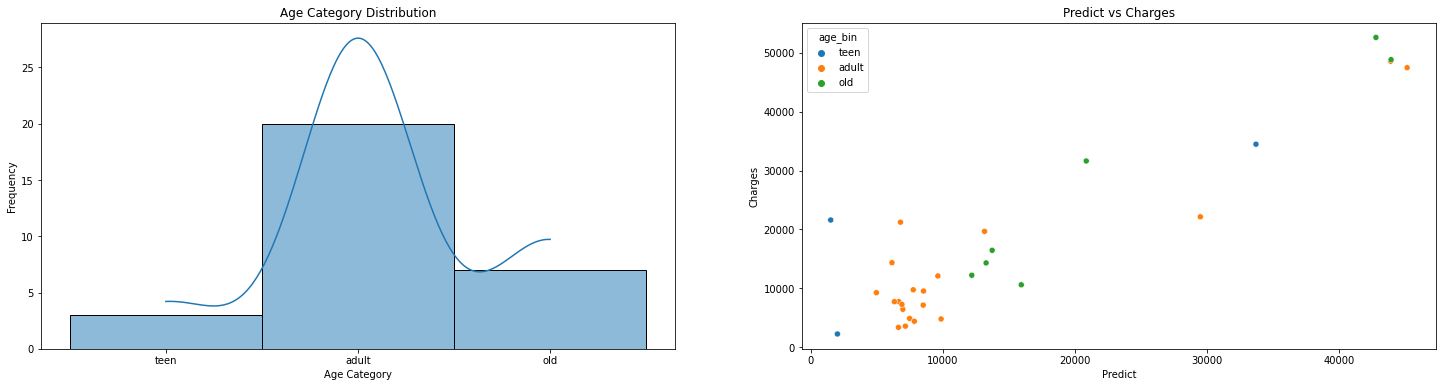

In [51]:
# Visualization of bmi
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age_bin', data=infDataFinalDF, kde=True)
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='predict', y='charges', data=infDataFinalDF, hue='age_bin')
plt.title('Predict vs Charges')
plt.xlabel('Predict')
plt.ylabel('Charges')
plt.show()

Dapat dilihat data pelanggan dengan usia dewasa merupakan data yang terbanyak dalam sampel ini. Ada beberapa data prediksi yang tidak sesuai dengan data aktual, akan tetapi banyak data juga yang nilai prediksinya tidak jauh berbeda dengan data aktual.

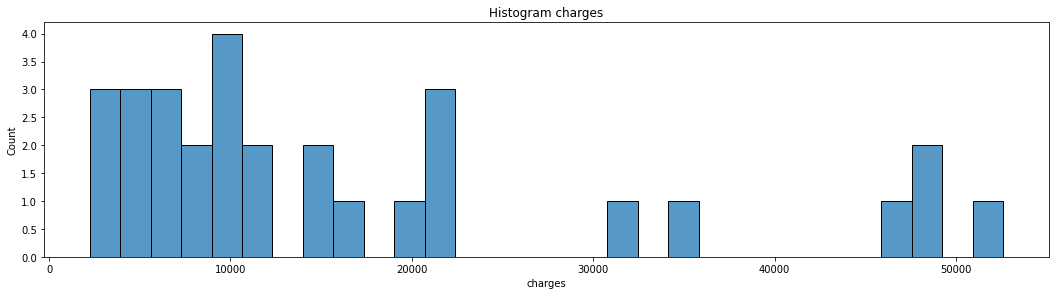

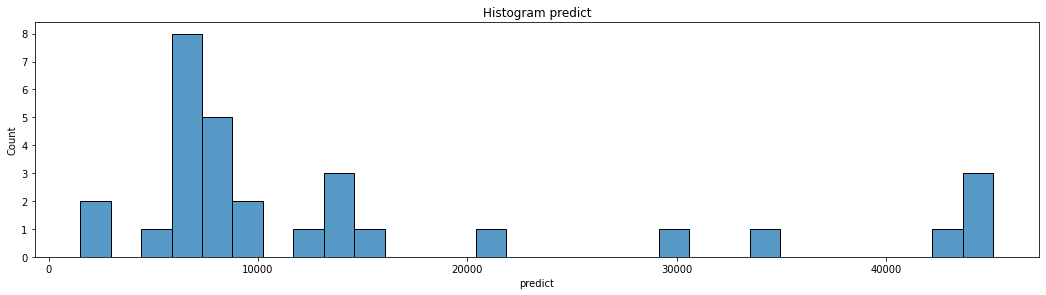

In [52]:
# Visualization of data inference
diagnosticPlots(infDataFinalDF, 'charges')
diagnosticPlots(infDataFinalDF, 'predict')

Berikut adalah visualiasi perbandingan antara actual data kolom `charges` dengan data `predict`. Ada perbedaan data `predict` dimana untuk data `predict` nilai diatas **50,000** tidak dapat diprediksi oleh model.

In [53]:
# Cek total aktual and predict
print('Total data charges - aktual : ', infDataFinalDF['charges'].sum().round(2))
print('')
print('Total data charges - prediction : ', infDataFinalDF['predict'].sum().round(2))

Total data charges - aktual :  516417.47

Total data charges - prediction :  449711.72


Terdapat total selisih antara charges aktual predictionnya sebesar **66705.75**.

# **11 - Model Saving**

---


Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.

In [54]:
# Model Saving
with open('BestRandomForestModel.pkl', 'wb') as file1:
  pickle.dump(randForBestEstGS, file1)

# **12 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Dari eksplorasi dan modeling data diatas dapat disimpulkan :
1. Model yang dipilih adalah Random Forest dengan Grid Search Tuning nilai R2-Scorenya sebesar **3%**, walaupun sedikit overfit antara data Train dan Test, tp nilai R2-Scorenya masih lebih baik dibanding dengan Polynomial Features yang sebesar **14%**
2. Terdapat korelasinya yang mana jika seseorang merokok dan memiliki bmi yang tinggi maka akan berpengaruh terhadap prediksi harganya. Jika orang itu merokok dan bminya tinggi maka semakin tinggi pula prediksi harganya.
3. Dari data dapat dikatakan semakin banyak seseorang punya anak maka orang tersebut cenderung memilih tidak merokok karena dikhawatirkan kebutuhan anaknya tidak tercukupi jika orang tersebut masih merokok
4. Model dengan Polynomial Features tidak dipilih karena nilai MAE nya masih besar dengan nilai **2010.72** dan nilai R2-Scorenya **14%**. Walaupun Random Forest juga dapat dikatakan sedikit over-fit namun nilainya masih lebih kecil dibandingkan dengan Polynomial Features.
5. Untuk further improvement selanjutnya mungkin saya bisa menggunakan model lain untuk perbandingan dan improvisasinya ditambah dengan metode randomized search.